In [1]:
from sklearn.datasets import fetch_openml

from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC


from sklearn.preprocessing import StandardScaler



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,precision_score,recall_score,precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import numpy as np


In [2]:
mnist = fetch_openml("mnist_784",as_frame = False)

X,y = mnist.data,mnist.target


In [3]:
print(X.shape,y.shape)

(70000, 784) (70000,)


In [8]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [4]:
def plot_dig(digit):
    image = digit.reshape(28,28)
    plt.imshow(image)
    

161

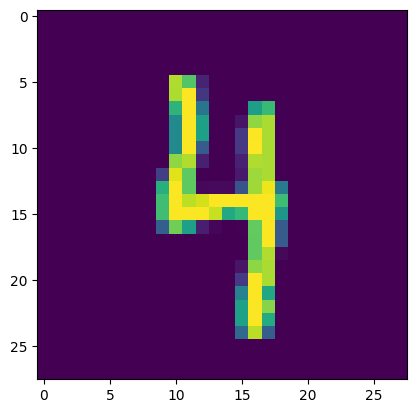

In [44]:
plot_dig(X[1110])
X.argmax()


In [6]:
x_train,x_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [7]:
test_5 = (y_train == "5")

print(test_5.shape, x_train.shape)

(60000,) (60000, 784)


In [8]:
sgd_model = SGDClassifier(random_state=42)

In [9]:
sgd_model.fit(x_train,test_5)

SGDClassifier(random_state=42)

In [10]:
sgd_model.predict([X[80]])


array([False])

In [11]:
cross_val_score(sgd_model,x_train,test_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [12]:
# dummy_model = DummyClassifier()
# dummy_model.fit(x_train,y_train)

In [13]:
cross_val_score(sgd_model,x_train,test_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [14]:
# cross_val_score(dummy_model,x_train,test_5,cv=3,scoring="accuracy")

In [15]:
pred = cross_val_predict(sgd_model,x_train,test_5,cv=3)
pred

array([ True, False, False, ...,  True, False, False])

In [16]:
con_matrix = confusion_matrix(pred,test_5)
con_matrix

array([[53892,  1891],
       [  687,  3530]], dtype=int64)

In [17]:
print(precision_score(test_5,pred),recall_score(test_5,pred))

0.8370879772350012 0.6511713705958311


In [18]:
x = sgd_model.decision_function([X[1]])
x

array([-5897.37359354])

In [19]:
threshold = 10000
x1 = (x>threshold)
x1

array([False])

In [20]:
# x = cross_val_predict(sgd_model,x_train,test_5,cv=3,method="decision_function")
# x

In [21]:
# precision,recall,threshold = precision_recall_curve(test_5,x)

In [22]:
# plt.plot(threshold,precision[:-1],label="precision",color="green")
# plt.plot(threshold,recall[:-1],label="recall",color="orange")
# plt.vlines(3000,0,1.0)
# plt.show()

In [23]:
# final_threshold = threshold[(precision >= 0.9).argmax()]
# print(final_threshold)
# a = np.array([1,2,3,4,5,6,7,8,9])
# print((a>=2).argmax())

In [24]:
# precision_score(test_5,(x >= final_threshold))

In [25]:
rnd_model = RandomForestClassifier(random_state=42)

In [26]:
rnd_model_pred = cross_val_predict(rnd_model,x_train,test_5,cv=3,method="predict_proba")

In [27]:
rnd_model_pred[:10]

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [28]:
y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [29]:
precision_rnd,recall_rnd,threshold_rnd = precision_recall_curve(test_5,rnd_model_pred[:,1])

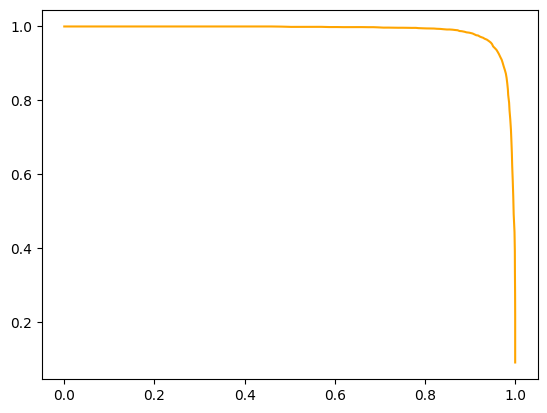

In [30]:
plt.plot(recall_rnd,precision_rnd,color="orange",label="random forest")
plt.show()

In [31]:
svc_model = SVC(random_state=42)
svc_model.fit(x_train[:1000],y_train[:1000])

SVC(random_state=42)

In [38]:
svc_model.predict([X[10]])


array(['3'], dtype=object)

In [33]:
# svc_desc = svc_model.decision_function([x_train[0]])
# svc_desc

In [34]:
# std_scaler = StandardScaler()
# x_train_std = std_scaler.fit_transform(x_train)

In [35]:
# svc_pred = cross_val_predict(svc_model,x_train_std[:1000],y_train[:1000],cv=3)

In [36]:
# ConfusionMatrixDisplay.from_predictions(y_train[:1000],svc_pred,normalize="true",values_format=".0%")
# plt.show()